In [36]:
import os
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from src import settings
from src.utils import fileio, graph_utils

TREATMENT = "CsCh"

INPUT_DIR = SCRIPT_OUTPUT = os.path.join(
    settings.RESULTS_DIR, TREATMENT, "distances_traveled"
)
distances = fileio.load_files_from_folder(INPUT_DIR, ".csv")

INPUT_DIR = SCRIPT_OUTPUT = os.path.join(
    settings.OUTPUT_DIR, TREATMENT, "1_1_create_snapshots", "600_sec_window"
)
interactions = fileio.load_multiple_folders(INPUT_DIR)

group = []
for distances_name, distances_path in distances.items():
    interactions_path = interactions[distances_name.replace(".csv","")] 
    interactions_group = fileio.load_files_from_folder(interactions_path, ".gml")

    res = []
    for graph_name, graph_path in interactions_group.items():
        G = nx.read_gml(graph_path)
        out_deg = G.out_degree()
        res.append(dict(out_deg))

    summed_dict = {}

    for dictionary in res:
        # Iterate over the keys in the current dictionary
        for key in dictionary.keys():
            # Add the corresponding value to the sum, or initialize it if not present
            summed_dict[key] = summed_dict.get(key, 0) + dictionary[key]

    distances = pd.read_csv(distances_path,index_col=0)
    distances = distances.sum()

    for key in summed_dict.keys():
        group.append((summed_dict[key], distances[key]))

In [ ]:
group


In [39]:
x = [item[0] for item in group]
y = [item[1] for item in group]

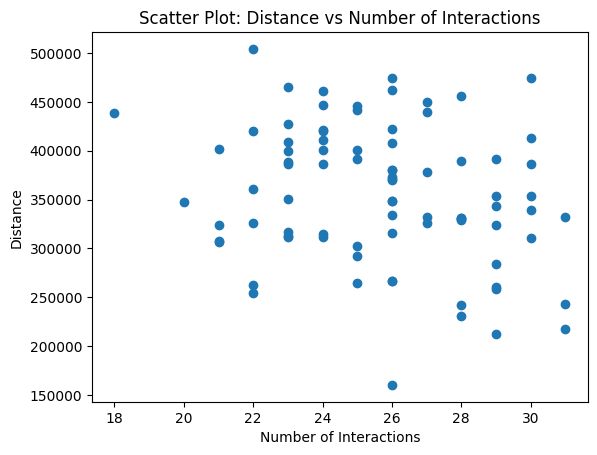

In [41]:
plt.scatter(x, y)
plt.ylabel('Distance')
plt.xlabel('Number of Interactions')
plt.title('Scatter Plot: Distance vs Number of Interactions')
plt.show()